## Libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
data= pd.read_csv(r'D:\University\Semester 7\Econometrics\Problems\5\Mexico.csv')

In [46]:
data.head()

,Country Name,Series Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Mexico,GDP (constant 2015 US$),8.764380e+11,8.728930e+11,8.725450e+11,8.851660e+11,9.198700e+11,9.410980e+11,9.834010e+11,1.005940e+12,...,1.050090e+12,1.088330e+12,1.103070e+12,1.134510e+12,1.171870e+12,1.202690e+12,1.228110e+12,1.255070e+12,1.252730e+12,1.150420e+12
1,Mexico,General government final consumption expenditu...,1.152630e+11,1.121180e+11,1.125040e+11,1.123290e+11,1.112380e+11,1.137480e+11,1.168280e+11,1.189570e+11,...,1.328280e+11,1.372950e+11,1.380400e+11,1.416470e+11,1.443410e+11,1.480910e+11,1.490770e+11,1.533350e+11,1.506040e+11,1.507200e+11
2,Mexico,Exports of goods and services (constant 2015 US$),2.125200e+11,2.114120e+11,2.122490e+11,2.162960e+11,2.376450e+11,2.526510e+11,2.723870e+11,2.777640e+11,...,3.230350e+11,3.441120e+11,3.488280e+11,3.731850e+11,4.045860e+11,4.190800e+11,4.365220e+11,4.627290e+11,4.695270e+11,4.352880e+11
3,Mexico,Imports of goods and services (constant 2015 US$),2.513440e+11,2.492300e+11,2.522400e+11,2.585730e+11,2.753370e+11,2.901470e+11,3.153480e+11,3.305680e+11,...,3.547770e+11,3.739940e+11,3.819160e+11,4.045290e+11,4.284840e+11,4.407100e+11,4.687410e+11,4.988800e+11,4.952470e+11,4.272250e+11


### Reshaping the data

In [47]:
d= pd.melt(data, ('Country Name', 'Series Name'), var_name= 'year')
d= d.pivot(index= ('Country Name', 'year'), columns= 'Series Name')
d.columns= ['Exports', 'GDP', 'Government', 'Imports']
d= d.reset_index()
print(d)

   Country Name  year       Exports           GDP    Government       Imports
0        Mexico  2000  2.125200e+11  8.764380e+11  1.152630e+11  2.513440e+11
1        Mexico  2001  2.114120e+11  8.728930e+11  1.121180e+11  2.492300e+11
2        Mexico  2002  2.122490e+11  8.725450e+11  1.125040e+11  2.522400e+11
3        Mexico  2003  2.162960e+11  8.851660e+11  1.123290e+11  2.585730e+11
4        Mexico  2004  2.376450e+11  9.198700e+11  1.112380e+11  2.753370e+11
5        Mexico  2005  2.526510e+11  9.410980e+11  1.137480e+11  2.901470e+11
6        Mexico  2006  2.723870e+11  9.834010e+11  1.168280e+11  3.153480e+11
7        Mexico  2007  2.777640e+11  1.005940e+12  1.189570e+11  3.305680e+11
8        Mexico  2008  2.749380e+11  1.017440e+12  1.224380e+11  3.414160e+11
9        Mexico  2009  2.450940e+11  9.636600e+11  1.260370e+11  2.869640e+11
10       Mexico  2010  2.999030e+11  1.012980e+12  1.289150e+11  3.359060e+11
11       Mexico  2011  3.230350e+11  1.050090e+12  1.328280e+11 

In [53]:
#We create values to Bilion$
d[['Exports', 'GDP', 'Government', 'Imports']]= \
    d[['Exports', 'GDP', 'Government', 'Imports']]/ 1000000000

In [55]:
d.describe()

,Exports,GDP,Government,Imports
count,21.000000,21.000000,21.000000,21.000000
mean,320.464333,1047.062905,130.302524,355.313143
std,89.425554,130.303497,15.322872,82.004742
min,211.412000,872.545000,111.238000,249.230000
25%,245.094000,941.098000,115.263000,286.964000
50%,299.903000,1017.440000,128.915000,341.416000
75%,404.586000,1150.420000,144.341000,427.225000
max,469.527000,1255.070000,153.335000,498.880000


We see that std is low for all 4 variebles and the average is also close to the median.
We see that imports are higher than exports in average but the std of exports is higher than imports pointing to higher variation in this variable.

In [57]:
d[[col+ '_growth' for col in ['Exports', 'GDP', 'Government', 'Imports']]]= d[['Exports', 'GDP', 'Government', 'Imports']].pct_change()*100

In [62]:
plt.style.use('fivethirtyeight')

([<matplotlib.axis.XTick at 0x24ec87bacd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

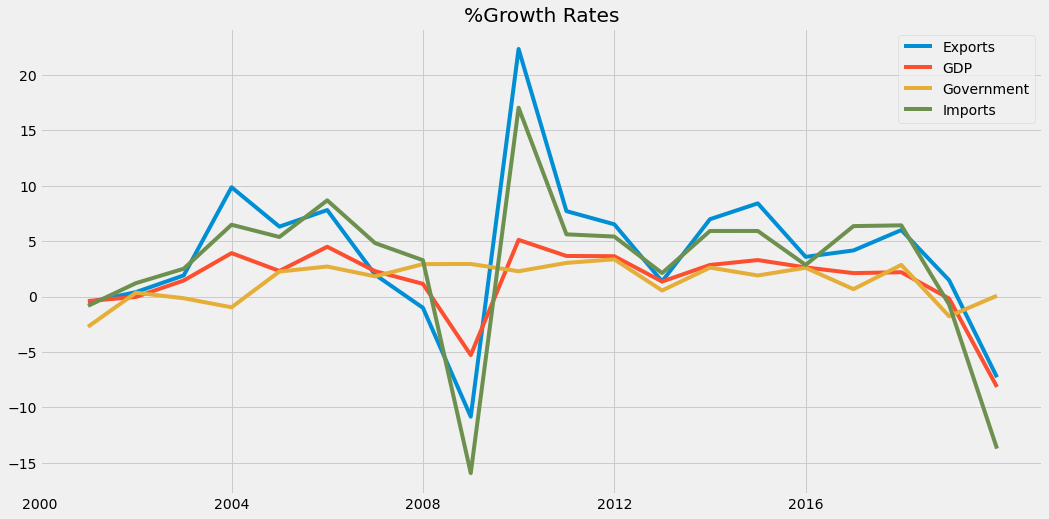

In [73]:
plt.figure(figsize= (16, 8))
for col in [col+ '_growth' for col in ['Exports', 'GDP', 'Government', 'Imports']]:
    plt.plot(d['year'], d[col])

plt.title('%Growth Rates')
plt.legend(['Exports', 'GDP', 'Government', 'Imports'])
plt.xticks(range(0, 20, 4))

In [77]:
d[[col+ '_log' for col in ['Exports', 'GDP', 'Government', 'Imports']]]= np.log(d[['Exports', 'GDP', 'Government', 'Imports']])

([<matplotlib.axis.XTick at 0x24ec8e3d8e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

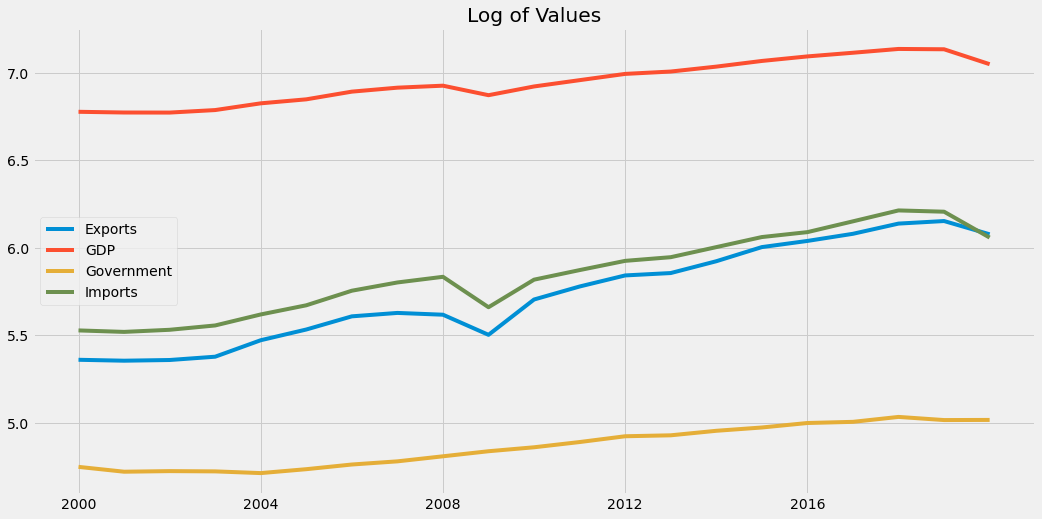

In [79]:
plt.figure(figsize= (16, 8))
for col in [col+ '_log' for col in ['Exports', 'GDP', 'Government', 'Imports']]:
    plt.plot(d['year'], d[col])

plt.title('Log of Values')
plt.legend(['Exports', 'GDP', 'Government', 'Imports'])
plt.xticks(range(0, 20, 4))

In [82]:
d[['Exports', 'GDP', 'Government', 'Imports']].corr()

,Exports,GDP,Government,Imports
Exports,1.000000,0.987738,0.974179,0.990670
GDP,0.987738,1.000000,0.966794,0.996097
Government,0.974179,0.966794,1.000000,0.959042
Imports,0.990670,0.996097,0.959042,1.000000


In [91]:
d[[col+ '_log' for col in ['Exports', 'GDP', 'Government', 'Imports']]].corr()

,Exports_log,GDP_log,Government_log,Imports_log
Exports_log,1.000000,0.991282,0.970223,0.992220
GDP_log,0.991282,1.000000,0.964465,0.997264
Government_log,0.970223,0.964465,1.000000,0.955804
Imports_log,0.992220,0.997264,0.955804,1.000000
